In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('data.csv', encoding='utf-8-sig', index_col=0)

df_notNa = df.dropna()

# 수도권 : 서울, 인천, 세종, 경기 -> 2
# 수도권 외 광역시: 부산, 대구, 광주, 대전, 울산 -> 1
# 그 외 지방: 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주 -> 0
print(df_notNa.describe())

print(df_notNa['region'].value_counts())
print(len(df_notNa['region'].value_counts()))

            region    education      jobtype       cptype        sales  \
count  1652.000000  1652.000000  1652.000000  1652.000000  1652.000000   
mean      0.789346     0.881356     0.498184     0.841404    -0.173198   
std       0.830481     1.183560     0.500148     0.814930     0.561740   
min       0.000000     0.000000     0.000000     0.000000    -0.378300   
25%       0.000000     0.000000     0.000000     0.000000    -0.377600   
50%       1.000000     0.000000     0.000000     1.000000    -0.362000   
75%       2.000000     2.000000     1.000000     2.000000    -0.285100   
max       2.000000     4.000000     1.000000     2.000000     5.813000   

         employees   aversalary      capital  pros_encoded  
count  1652.000000  1652.000000  1652.000000   1652.000000  
mean     -0.020912     0.134184    -0.128170      0.335334  
std       0.788518     1.006900     0.096018      0.968983  
min      -0.416800    -2.581900    -0.154600     -1.070900  
25%      -0.398950    -0.437

d:\anaconda3\envs\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


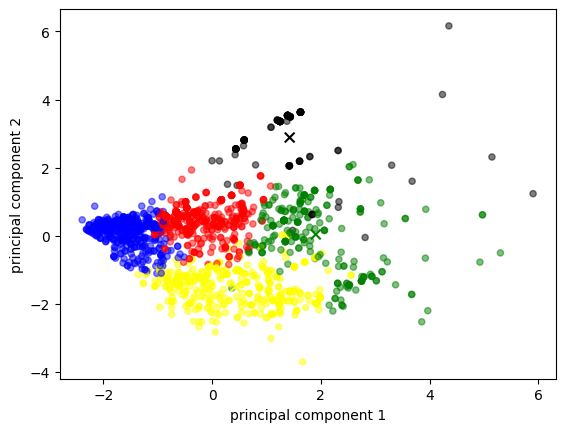

In [40]:
numClusters = 5
colors = ['red', 'green', 'blue', 'black', 'yellow']
X = df_notNa
kmeans = KMeans(n_clusters=numClusters).fit(X)

regions = X['region']
labels = kmeans.predict(X)
dataPointColor = [colors[row] for row in labels]

centroids = kmeans.cluster_centers_
centroidColor = [colors[item] for item in range(numClusters)]

# pca = PCA(n_components=3)
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    # 'p_component 3',
                                    ])
c_transformed = pca_fit.transform(centroids)

fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
        #    principalDf['p_component 3'],
           c=dataPointColor,
           s=20,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
# ax.set_zlabel('principal component 3')

plt.scatter(c_transformed[:, 0], 
            c_transformed[:, 1], 
            # c_transformed[:, 2],
            c=centroidColor,
            s=50,
            marker='x',)

plt.show()

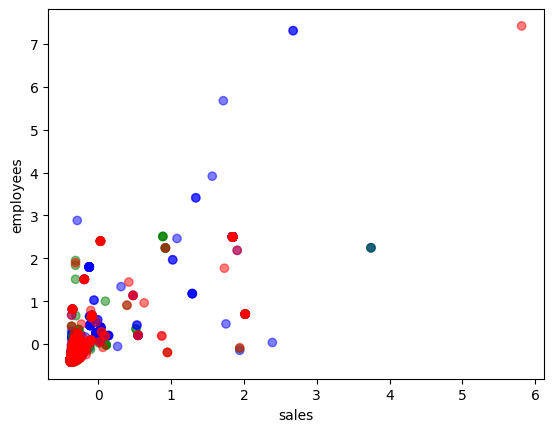

In [70]:
numClusters = 3
regionColors = ['red', 'green', 'blue']
dataPointColor = [regionColors[row] for row in df_notNa['region']]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(df_notNa['sales'], 
            df_notNa['employees'], 
            # df_notNa['aversalary'], 
            c=dataPointColor,
            alpha=0.5,
            )

ax.set_xlabel('sales')
ax.set_ylabel('employees')
# ax.set_zlabel('aversalary')

plt.show()

d:\anaconda3\envs\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myvenv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


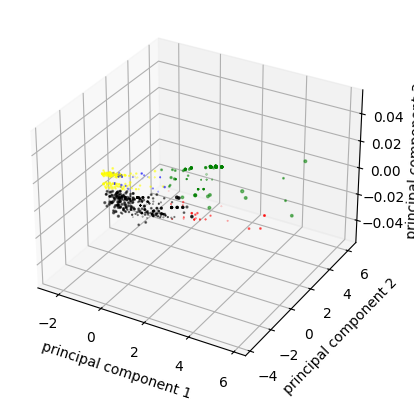

In [55]:
numClusters = 5
colors = ['red', 'green', 'blue', 'black', 'yellow']
X = df_notNa
kmeans = KMeans(n_clusters=numClusters).fit(X)

regions = X['region']
labels = kmeans.predict(X)
dataPointColor = [colors[row] for row in labels]

centroids = kmeans.cluster_centers_
centroidColor = [colors[item] for item in range(numClusters)]

pca = PCA(n_components=3)
# pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    'p_component 3',
                                    ])
c_transformed = pca_fit.transform(centroids)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
           principalDf['p_component 3'],
           c=dataPointColor,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

plt.scatter(c_transformed[:, 0], 
            c_transformed[:, 1], 
            c_transformed[:, 2],
            c=centroidColor,
            marker='x',)

plt.show()

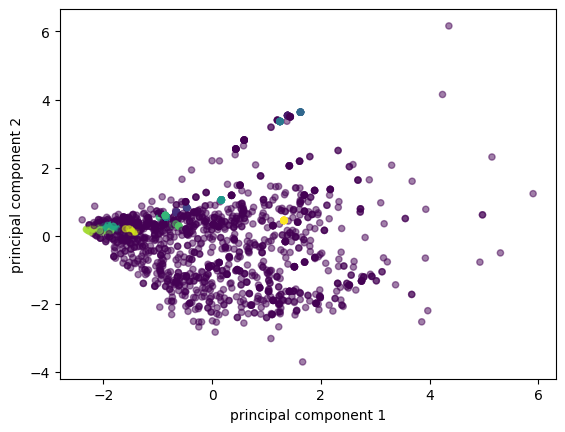

Number of clusters in labels:  16


In [52]:
X = df_notNa
clustering = DBSCAN(eps=0.2, min_samples=10).fit(X)

regions = X['region']
labels = clustering.labels_

# pca = PCA(n_components=3)
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    # 'p_component 3',
                                    ])

fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
        #    principalDf['p_component 3'],
        s=20,
           c=labels,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
# ax.set_zlabel('principal component 3')

plt.show()

print("Number of clusters in labels: ", len(set(clustering.labels_)))

d:\anaconda3\envs\myvenv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


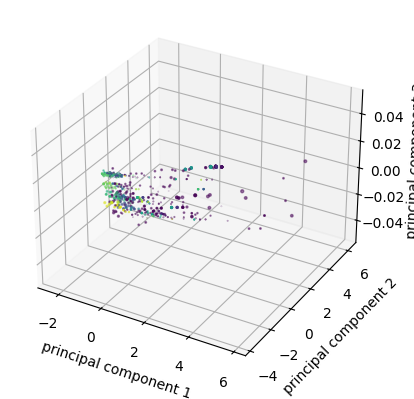

74


In [49]:
X = df_notNa
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)

regions = X['region']
labels = clustering.labels_

pca = PCA(n_components=3)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    'p_component 3',
                                    ])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
           principalDf['p_component 3'],
           c=labels,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

plt.show()

print(len(set(clustering.labels_)))